# =============================================================
# MILESTONE 3: Machine Learning Model Development and Optimization
# =============================================================

In [2]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/Reemsoliiman/customer-churn-prediction-analysis/main/data/processed/cleaned_data.csv"
df = pd.read_csv(url)

# Features (X) and Target (y)

In [4]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train/test split (80/20) with stratification

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:", np.bincount(y_train))

Before SMOTE: [1822  310]



# Apply SMOTE only to training set

In [6]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train_resampled))

After SMOTE: [1822 1822]


## LogisticRegression Model

In [7]:
log_reg = LogisticRegression(max_iter=1000, solver="liblinear") 
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  

Accuracy : 0.8333333333333334
Precision: 0.4126984126984127
Recall   : 0.3333333333333333
F1-score : 0.36879432624113473
ROC-AUC  : 0.7623987854251012

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       456
           1       0.41      0.33      0.37        78

    accuracy                           0.83       534
   macro avg       0.65      0.63      0.64       534
weighted avg       0.82      0.83      0.83       534


Confusion Matrix:
 [[419  37]
 [ 52  26]]


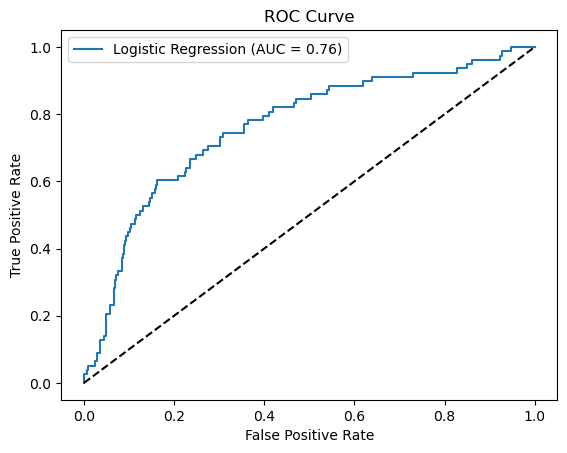

In [8]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)
print("ROC-AUC  :", roc_auc)

print("\n Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()